# Введение в анализ данных
## НИУ ВШЭ, 2020-2021 учебный год

### Домашнее задание №8

In [1]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, mean_squared_error

## Градиентный бустинг своими руками (2 + 2* баллов)

Реализуйте алгоритм градиентного бустинга для регрессии. Напомним основные формулы.

Обозначим текущую композицию на $N-1$ шаге за $a_{N - 1}(x_i)$. Следующий базовый алгоритм $b_N(x_i)$ обучается на ответах $-\frac{\partial L(y_i, z)}{\partial z}\Bigl|_{z = a_{N - 1}(x_i)}$, где $L(y_i, z)$ — значение функции потерь на объекте при правильном ответе $y_i$ и предсказании $z$. Композиция на следующем шаге получается следующим образом:

$$
a_N(x_i) = a_{N-1}(x_i) + \nu\gamma_Nb_N(x_i)
$$

Здесь $\nu$ — гиперпараметр learning rate, $\gamma_N$ — оптимальный вес, настраиваемый на каждом шаге алгоритма, который можно найти по следующей формуле (обратите внимание на отсутствие $\nu$):

$$
\gamma_N = \mathrm{arg}\min_\gamma \frac{1}{\ell}\sum\limits_{i=1}^{\ell}L\left(y_i, a_{N - 1}(x_i) + \gamma b_N(x_i)\right)
$$

Можете принять $\gamma_N = 1$ для каждого $N$. Реализуйте нахождение оптимального $\gamma_N$ на каждом шаге, чтобы получить ещё 1 балл.

В качестве функции потерь возьмите MSE.

*Примечание. Вы можете использовать `DecisionTree` из `sklearn` и методы оптимизации из различных библиотек.*

In [2]:
# это может помочь вам для поиска оптимальных gamma
from scipy.optimize import minimize

In [ ]:
class GradientBoosting:
    def __init__(self, n_estimators, max_depth, learning_rate=0.1):
        """
        PARAMETERS:
        n_estimators - number of trees in the ensemble
        max_depth - maximum depth of a tree
        learning_rate - coefficient by which new algorithm result is multiplied
        """
        
        self._n_estimators = n_estimators
        self._max_depth = max_depth
        self._learning_rate = learning_rate
        
    def fit(self, x, y):
        """
        INPUT:
        x - np.array of shape (k, d)
        y - np.array of shape (k,)
        """
        # Здесь нам нужно проитерироваться по n_estimators и обучить
        # соответствующее количество деревьев с помощью _fit_predict_tree(),
        # правильно обновляя y_new
        # Деревья нужно где-то сохранить, чтобы затем использовать в predict()
        # your code here
        
        
        for ...:
            y_new = ...
            # your code here

    def _fit_predict_tree(self, x, y):
        # Обучаем дерево и возвращаем его предикшн
        tree = ...
        # your code here
        return self.gamma * self.learning_rate * tree.predict(x)
        
    def predict(self, x):
        """
        INPUT:
        x - np.array of shape (m, d)
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        # Используем сохранённые деревья для расчёта агрегированного предикшна
        # your code here
        return y_pred

Проверьте вашу реализацию на Boston dataset. Подберите оптимальные гиперпараметры, чтобы победить RandomForestRegressor как в обычном случае, так и при нахождении оптимального шага **(не меняйте параметры сида)**. При необходимости воспользуйтесь GridSearch. За это вы получите ещё 1 балл.

In [ ]:
boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_features=4, n_estimators=640, random_state=19052019)

rf.fit(X_train, y_train)
mean_squared_error(y_test, rf.predict(X_test))

In [ ]:
np.random.seed(19052019)

# your code here

In [ ]:
mean_squared_error(y_test, y_pred)

Для удобства проверяющего укажите, пожалуйста, реализовали ли вы нахождение оптимального шага?

- Да / **Нет**

## Прогнозируем задержки самолётов (2 балла)

Поработаем с задачей про задержки самолётов. На основании доступных данных о рейсе вам нужно определить, будет ли он задержан на 15 минут.
Воспользуйтесь любыми методами градиентного бустинга {XGboost, catboost, LightGBM} и GridSearch для достижения результата. Получите 1 балл за преодоление порога roc_auc_score 0.72 и ещё 1 балл за преодоление порога 0.74.

In [76]:
import pandas as pd
train = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw08-boosting-clustering/flight_delays_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw08-boosting-clustering/flight_delays_test.csv')

In [77]:
train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [54]:
# Референс

from xgboost.sklearn import XGBClassifier

X_train = train[['Distance', 'DepTime']].values
y_train = train['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values
X_test = test[['Distance', 'DepTime']].values

X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size=0.3)

xgb = XGBClassifier()
xgb.fit(X_train_part, y_train_part)
roc_auc_score(y_valid, xgb.predict_proba(X_valid)[:, 1])

C:\Users\Anna\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:44:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7069345099502813

In [79]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df = train.drop(columns = ['DepTime', 'Distance'])

train_enc = df.apply(LabelEncoder().fit_transform)
train_enc.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,dep_delayed_15min
0,10,13,6,0,18,78,0
1,6,12,2,18,217,171,0
2,11,11,4,20,228,59,0
3,2,17,5,15,78,175,0
4,1,28,5,19,174,199,1


In [81]:
train_enc = pd.concat([train_enc, train[['DepTime', 'Distance']]], axis=1)

In [83]:
train_enc.head(3)

,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,dep_delayed_15min,DepTime,Distance
0,10,13,6,0,18,78,0,1934,732
1,6,12,2,18,217,171,0,1548,834
2,11,11,4,20,228,59,0,1422,416


In [84]:
y_train = train_enc['dep_delayed_15min']
X_train = train_enc.drop(columns = ['dep_delayed_15min'])

In [85]:
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size=0.3)

In [105]:
clf = CatBoostClassifier(use_best_model=True, logging_level='Silent', random_seed=42, leaf_estimation_iterations=10)

model.fit(
    X_train_part, y_train_part,
    eval_set=(X_valid, y_valid),
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [106]:
roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1])

0.7341554510463613

In [108]:
clf = CatBoostClassifier(logging_level='Silent', random_seed=42, leaf_estimation_iterations=10)

params = {'iterations': [10, 50, 100, 500, 1000, 2000],
          'depth': [3, 4, 5, 6, 7],
          'learning_rate' : [0.01, 0.03, 0.1, 0.3],
          'l2_leaf_reg': [0.05, 0.1, 1.0, 3.0, 5.0]
         }

grid_search_result = clf.grid_search(params, 
                                       X=X_train_part, 
                                       y=y_train_part, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.6458479	best: 0.6458479 (0)	total: 192ms	remaining: 1m 55s
1:	loss: 0.5771821	best: 0.5771821 (1)	total: 294ms	remaining: 1m 27s
2:	loss: 0.4797140	best: 0.4797140 (2)	total: 394ms	remaining: 1m 18s
3:	loss: 0.4440698	best: 0.4440698 (3)	total: 502ms	remaining: 1m 14s
4:	loss: 0.6464987	best: 0.4440698 (3)	total: 605ms	remaining: 1m 12s
5:	loss: 0.5777172	best: 0.4440698 (3)	total: 712ms	remaining: 1m 10s
6:	loss: 0.4800910	best: 0.4440698 (3)	total: 818ms	remaining: 1m 9s
7:	loss: 0.4444744	best: 0.4440698 (3)	total: 925ms	remaining: 1m 8s
8:	loss: 0.6462008	best: 0.4440698 (3)	total: 1.05s	remaining: 1m 8s
9:	loss: 0.5759082	best: 0.4440698 (3)	total: 1.17s	remaining: 1m 9s
10:	loss: 0.4782456	best: 0.4440698 (3)	total: 1.32s	remaining: 1m 10s
11:	loss: 0.4439845	best: 0.4439845 (11)	total: 1.43s	remaining: 1m 10s
12:	loss: 0.6457107	best: 0.4439845 (11)	total: 1.55s	remaining: 1m 9s
13:	loss: 0.5769542	best: 0.4439845 (11)	total: 1.68s	remaining: 1m 10s
14:	loss: 0.477015

114:	loss: 0.4204167	best: 0.4204167 (114)	total: 11m 51s	remaining: 50m 2s
115:	loss: 0.4217392	best: 0.4204167 (114)	total: 12m 16s	remaining: 51m 12s
116:	loss: 0.4304239	best: 0.4204167 (114)	total: 12m 40s	remaining: 52m 20s
117:	loss: 0.4239982	best: 0.4204167 (114)	total: 13m 8s	remaining: 53m 38s
118:	loss: 0.4208715	best: 0.4204167 (114)	total: 13m 32s	remaining: 54m 45s
119:	loss: 0.4211855	best: 0.4204167 (114)	total: 13m 58s	remaining: 55m 52s
120:	loss: 0.6447658	best: 0.4204167 (114)	total: 13m 58s	remaining: 55m 18s
121:	loss: 0.5747856	best: 0.4204167 (114)	total: 13m 58s	remaining: 54m 44s
122:	loss: 0.4762528	best: 0.4204167 (114)	total: 13m 58s	remaining: 54m 11s
123:	loss: 0.4422682	best: 0.4204167 (114)	total: 13m 58s	remaining: 53m 39s
124:	loss: 0.6454557	best: 0.4204167 (114)	total: 13m 58s	remaining: 53m 7s
125:	loss: 0.5746747	best: 0.4204167 (114)	total: 13m 58s	remaining: 52m 36s
126:	loss: 0.4771351	best: 0.4204167 (114)	total: 13m 59s	remaining: 52m 5s
127

222:	loss: 0.4205435	best: 0.4197680 (218)	total: 24m 25s	remaining: 41m 17s
223:	loss: 0.4237188	best: 0.4197680 (218)	total: 24m 56s	remaining: 41m 52s
224:	loss: 0.4277221	best: 0.4197680 (218)	total: 25m 27s	remaining: 42m 26s
225:	loss: 0.4219030	best: 0.4197680 (218)	total: 26m	remaining: 43m 1s
226:	loss: 0.4192155	best: 0.4192155 (226)	total: 26m 31s	remaining: 43m 35s
227:	loss: 0.4222981	best: 0.4192155 (226)	total: 27m 3s	remaining: 44m 8s
228:	loss: 0.4277470	best: 0.4192155 (226)	total: 27m 35s	remaining: 44m 41s
229:	loss: 0.4211544	best: 0.4192155 (226)	total: 28m 7s	remaining: 45m 14s
230:	loss: 0.4199549	best: 0.4192155 (226)	total: 28m 44s	remaining: 45m 54s
231:	loss: 0.4231505	best: 0.4192155 (226)	total: 29m 17s	remaining: 46m 28s
232:	loss: 0.4278695	best: 0.4192155 (226)	total: 29m 51s	remaining: 47m 1s
233:	loss: 0.4215384	best: 0.4192155 (226)	total: 30m 26s	remaining: 47m 37s
234:	loss: 0.4197893	best: 0.4192155 (226)	total: 31m 2s	remaining: 48m 13s
235:	loss

330:	loss: 0.4206258	best: 0.4192155 (226)	total: 41m 29s	remaining: 33m 43s
331:	loss: 0.4224523	best: 0.4192155 (226)	total: 41m 46s	remaining: 33m 43s
332:	loss: 0.4316485	best: 0.4192155 (226)	total: 42m 3s	remaining: 33m 43s
333:	loss: 0.4228565	best: 0.4192155 (226)	total: 42m 20s	remaining: 33m 43s
334:	loss: 0.4198344	best: 0.4192155 (226)	total: 42m 38s	remaining: 33m 43s
335:	loss: 0.4216404	best: 0.4192155 (226)	total: 42m 56s	remaining: 33m 44s
336:	loss: 0.4316814	best: 0.4192155 (226)	total: 43m 13s	remaining: 33m 43s
337:	loss: 0.4229741	best: 0.4192155 (226)	total: 43m 30s	remaining: 33m 43s
338:	loss: 0.4200008	best: 0.4192155 (226)	total: 43m 47s	remaining: 33m 43s
339:	loss: 0.4215846	best: 0.4192155 (226)	total: 44m 5s	remaining: 33m 43s
340:	loss: 0.4254899	best: 0.4192155 (226)	total: 44m 37s	remaining: 33m 53s
341:	loss: 0.4207274	best: 0.4192155 (226)	total: 45m 10s	remaining: 34m 4s
342:	loss: 0.4214686	best: 0.4192155 (226)	total: 45m 43s	remaining: 34m 15s
34

437:	loss: 0.4265072	best: 0.4192155 (226)	total: 1h 16s	remaining: 22m 17s
438:	loss: 0.4204161	best: 0.4192155 (226)	total: 1h 32s	remaining: 22m 12s
439:	loss: 0.4235487	best: 0.4192155 (226)	total: 1h 46s	remaining: 22m 5s
440:	loss: 0.4297669	best: 0.4192155 (226)	total: 1h 1m 5s	remaining: 22m 1s
441:	loss: 0.4216889	best: 0.4192155 (226)	total: 1h 1m 25s	remaining: 21m 57s
442:	loss: 0.4220306	best: 0.4192155 (226)	total: 1h 1m 44s	remaining: 21m 53s
443:	loss: 0.4270067	best: 0.4192155 (226)	total: 1h 2m 4s	remaining: 21m 48s
444:	loss: 0.4302407	best: 0.4192155 (226)	total: 1h 2m 26s	remaining: 21m 45s
445:	loss: 0.4226508	best: 0.4192155 (226)	total: 1h 2m 46s	remaining: 21m 40s
446:	loss: 0.4222713	best: 0.4192155 (226)	total: 1h 3m 9s	remaining: 21m 37s
447:	loss: 0.4256698	best: 0.4192155 (226)	total: 1h 3m 34s	remaining: 21m 34s
448:	loss: 0.4301318	best: 0.4192155 (226)	total: 1h 4m 3s	remaining: 21m 32s
449:	loss: 0.4217320	best: 0.4192155 (226)	total: 1h 4m 27s	remaini

541:	loss: 0.4254653	best: 0.4187646 (458)	total: 1h 24m 1s	remaining: 8m 59s
542:	loss: 0.4242913	best: 0.4187646 (458)	total: 1h 24m 13s	remaining: 8m 50s
543:	loss: 0.4301571	best: 0.4187646 (458)	total: 1h 24m 25s	remaining: 8m 41s
544:	loss: 0.4335997	best: 0.4187646 (458)	total: 1h 24m 37s	remaining: 8m 32s
545:	loss: 0.4255100	best: 0.4187646 (458)	total: 1h 24m 49s	remaining: 8m 23s
546:	loss: 0.4238816	best: 0.4187646 (458)	total: 1h 25m	remaining: 8m 14s
547:	loss: 0.4285540	best: 0.4187646 (458)	total: 1h 25m 11s	remaining: 8m 5s
548:	loss: 0.4338463	best: 0.4187646 (458)	total: 1h 25m 23s	remaining: 7m 55s
549:	loss: 0.4254001	best: 0.4187646 (458)	total: 1h 25m 35s	remaining: 7m 46s
550:	loss: 0.4227067	best: 0.4187646 (458)	total: 1h 25m 48s	remaining: 7m 37s
551:	loss: 0.4266357	best: 0.4187646 (458)	total: 1h 25m 59s	remaining: 7m 28s
552:	loss: 0.4339392	best: 0.4187646 (458)	total: 1h 26m 12s	remaining: 7m 19s
553:	loss: 0.4256917	best: 0.4187646 (458)	total: 1h 26m 2

In [109]:
roc_auc_score(y_valid, clf.predict_proba(X_valid)[:, 1])

0.7425457728956084

Катбустом и без гридсерча получилось хорошо, а с гридсерчем даже больше 74.

## DBSCAN своими руками (2 + 2* баллов)

DBSCAN: Density-based spatial clustering of applications with noise

Реализуйте класс dbscan.

Алгоритм имеет два основных гиперпараметра:
1. `eps` &mdash; радиус рассматриваемой окрестности
2. `min_samples` &mdash; число соседей в окрестности

Для выполнения кластеризации DBSCAN точки делятся на основные точки, достижимые по плотности точки и выпадающие следующим образом:

- Точка $p$ является основной точкой, если по меньшей мере `min_samples` точек находятся на расстоянии, не превосходящем 
`eps` от неё. Говорят, что эти точки достижимы прямо из $p$.

-  Точка $q$ прямо достижима из $p$, если точка $q$ находится на расстоянии, не большем `eps`, от точки $p$, и $p$ — основная точка.
Точка $q$ достижима из $p$, если имеется путь 
$p_1,…,p_n$ где $p_1=p$ и $p_n=q$ , а каждая точка $p_{i+1}$ достижима прямо из $p_i$ (все точки на пути должны быть основными, за исключением $q$).

Все точки, не достижимые из основных точек, считаются выбросами.

Теперь, если $p$ является основной точкой, то она формирует кластер вместе со всеми точками (основными или неосновными), достижимыми из этой точки. Каждый кластер содержит по меньшей мере одну основную точку. Неосновные точки могут быть частью кластера, но они формируют его «край», поскольку не могут быть использованы для достижения других точек.


In [147]:
# Это может помочь вам для поиска дистанции между точками
import scipy.spatial.distance

In [204]:
# Рекомендации -- это только рекомендации

class dbscan:
    def __init__(self, eps, min_samples):

        self.eps = eps
        self.min_samples = min_samples
        
    
    def fit_predict(self, X):
        # Помечаем переданные точки, чтобы отличать уже кластеризованные
        # или являющиеся шумом от остальных


        def range_query(self, x):
            """Возвращает точки на расстоянии <= eps от x"""

            distances = np.array(list(map(lambda v: scipy.spatial.distance.euclidean(x, v), self.points)))
            eps_points = self.points[distances < self.eps]

            return eps_points
        
        
        def grow_cluster(self, root, neighbours):
            # В этой функции мы полностью строим кластер относительно переданной точки
            # Т.е. реализуем цикл по структуре данных, изначально состоящей из уже
            # известных соседей (neighbours) и в процессе пополняющейся
            # "соседями соседей" с помощью range_query()

            # новый класс - номер на 1 больше последнего известного класса
            class_new = max(self.y) + 1
            

            # создаем массив из нулей по размеру всей выборки
            m = np.where(self.points, 0, 0)

            for i in neighbours: # отмечаем в этом массиве соседей
                m = m+np.where(self.points==i, 1, 0)
            
            mask = m==[1,1]
           
            self.y[mask[:,1]] = np.array([class_new]*len([mask[:,1]]))
            
            #print(self.y[mask[:,1]])

                # повторяем то же самое для соседей соседей
            for neig in neighbours:
                new_neig = range_query(self, neig)
                m = np.where(self.points, 0, 0)

                for i in new_neig: 
                    m = m+np.where(self.points==i, 1, 0)
                mask = m==[1,1]

                self.y[mask[:,1]] = np.array([class_new]*len(self.y[mask[:,1]]))


            return self.y
        
        # Шаг 0: сколько объектов и признаков?
        num_obj = X.shape[0]
        num_feat = X.shape[1]
        self.points = np.array(X) # все объекты
        
        # Шаг 1.1: инициализируйте y - вектор длины число объектов, 
        # хранящий, к какому кластеру относится каждый объект
        # каждый элемент - случайно выбранный номер кластера (используйте np.random.randint)
        
        self.y = np.array([0]*num_obj) # списаок классов для каждой точки
         
        # Реализуем цикл по точкам, игнорирущий уже кластеризованные
        
        for point in self.points[self.y==0]: # для точек у которых класс - ноль
            neig = range_query(self, point) # массив точек в радиусе eps
            if len(neig) < self.min_samples:
                mask = self.points==point
                self.y[mask[:, 1]] = -1
            else:
                grow_cluster(self, point, neig)
        
        y = self.y
        return y
            
        # Если точка ещё не кластеризована, с помощью range_query() ищем её соседей
        # Если соседей недостаточно, то помечаем её выделенным под шум лейблом
        # (однако она ещё может попасть в какой-то иной кластер)
        # Если же соседей достаточно, будем строить от неё кластер с помощью grow_cluster()
    

Проверим себя на простом примере:

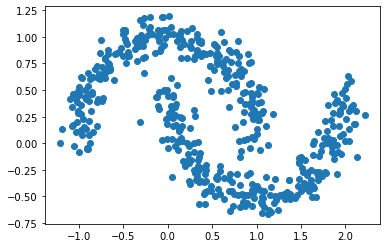

In [133]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd

X, _ = make_moons(n_samples=500, noise=0.1)
plt.scatter(X[:,0], X[:,1])
plt.show()

Кластеризуйте это с помощью своей версии DBSCAN:

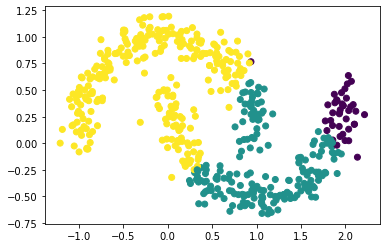

In [214]:
clusters = dbscan(eps=0.7, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()

Референс:

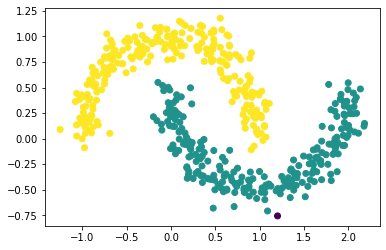

In [114]:
from sklearn.cluster import DBSCAN

clusters = DBSCAN(eps=0.2, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()

Получите 1 балл за ещё один интересный пример кластеризации (в качестве референса используйте предоставленное изображение. Нужно несколько интересных соседствующих форм):

In [215]:
from sklearn.datasets import make_moons, make_circles, make_blobs
import matplotlib.pyplot as plt

X0, y0 = make_circles(n_samples=700, noise=0.05, factor=0.3)

centers = [[0.5, 0.5], [-0.5, 0.5]]

X10, y10 = make_blobs(n_samples=200, centers=centers, cluster_std=0.05, random_state=0)

X = np.concatenate([X0, X10])

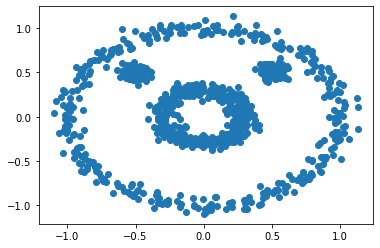

In [216]:
plt.scatter(X[:,0], X[:,1])
plt.show()

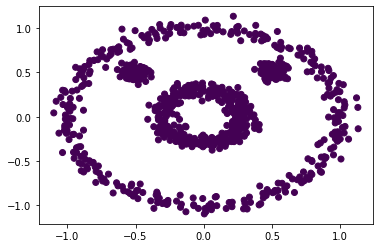

In [218]:
clusters = DBSCAN(eps=0.2, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()

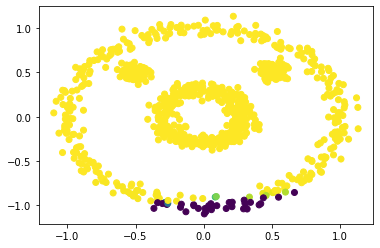

In [217]:
clusters = dbscan(eps=0.7, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()

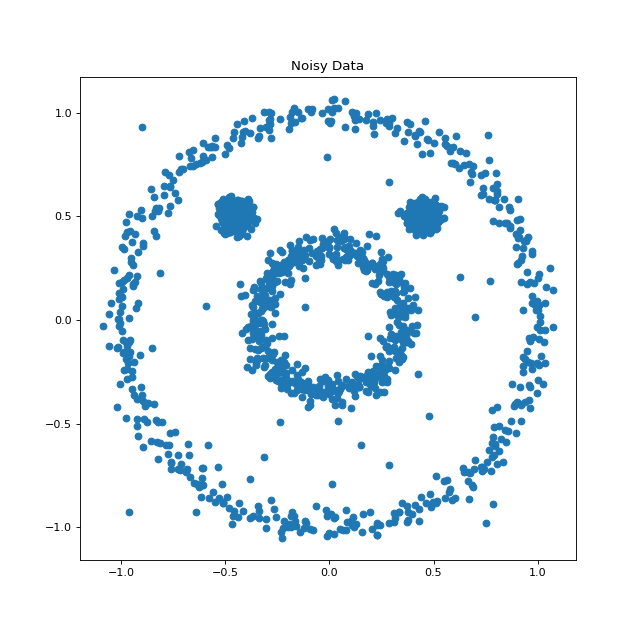

Получите ещё 1 балл, если время работы вашего алгоритма больше референсного не более чем в 100 раз с учётом погрешности 3% от вашего времени:

In [219]:
%%time
%%capture
clusters = DBSCAN(eps=0.2, min_samples=10).fit_predict(X)

Wall time: 54.9 ms


In [220]:
%%time
%%capture
clusters = dbscan(eps=0.2, min_samples=10).fit_predict(X)

Wall time: 8min 59s
